In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib as jb
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
#Reading the training.csv by removing the duplicates /missing values since it's last column
DATA_PATH="dataset/Training.csv"
data=pd.read_csv(DATA_PATH).dropna(axis=1)

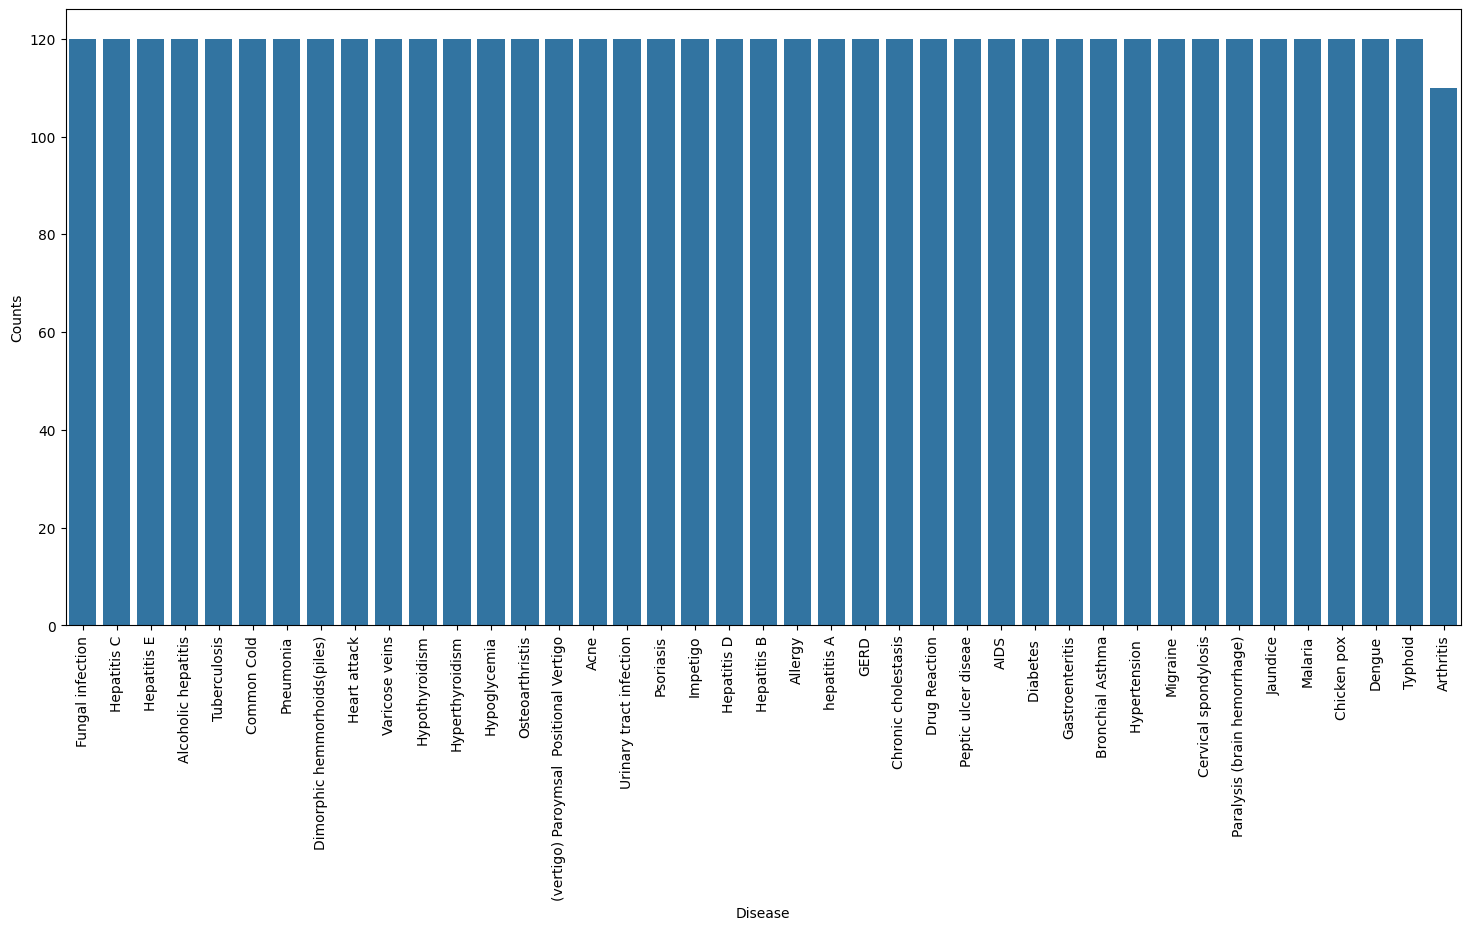

In [11]:
#checking the Dataset
disease_counts=data["prognosis"].value_counts()
temp_of = pd.DataFrame({
          "Disease" : disease_counts.index,
          "Counts"  : disease_counts.values
})
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_of)
plt.xticks(rotation=90)
plt.show()

In [13]:
#Encoding the target value into numerical value using LabelEncoder

encoder=LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
X=data.iloc[:, :-1]
y=data.iloc[:, -1]
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=24)

print(f"Train:{X_train.shape},{y_train.shape}")
print(f"Test:{X_test.shape},{y_test.shape}")

Train:(3928, 132),(3928,)
Test:(982, 132),(982,)


In [14]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

In [15]:
#Creating models
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

Model: SVC
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


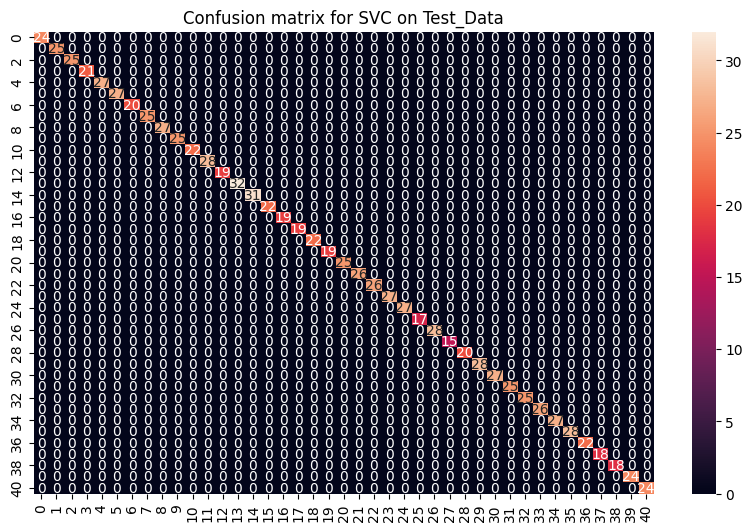

Model: Gaussian NB
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


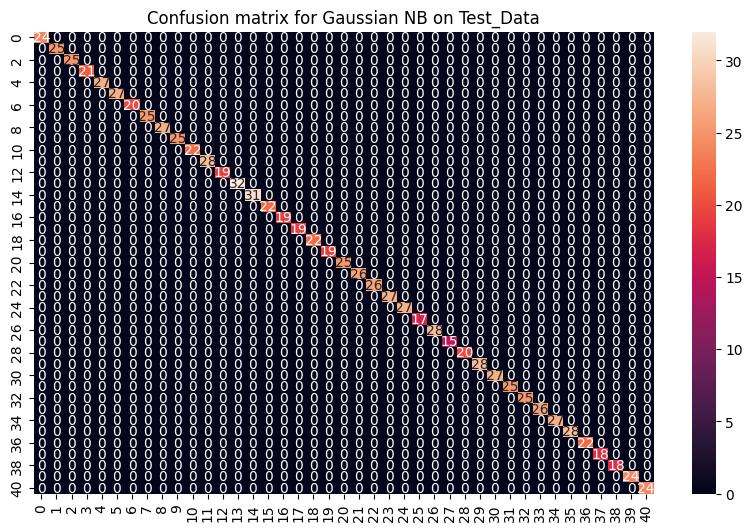

Model: Random Forest
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


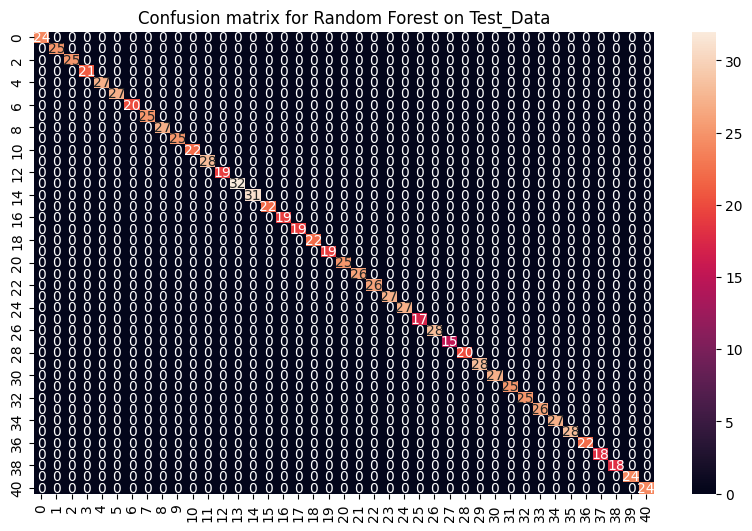

In [22]:
#Training and Testing the models
for model_name,model in models.items():
    model.fit(X_train,y_train)
    preds=model.predict(X_test)

    print(f"Model: {model_name}")
    print(f"Accuracy on train data: {accuracy_score(y_train, model.predict(X_train)) * 100:.2f}%")
    print(f"Accuracy on test data: {accuracy_score(y_test, preds) * 100:.2f}%")
    cf_matrix=confusion_matrix(y_test,preds)
    plt.figure(figsize=(10,6))
    sns.heatmap(cf_matrix,annot=True)
    plt.title(f"Confusion matrix for {model_name} on Test_Data")
    plt.show()

In [23]:
# Training the models on whole data
final_svm_model = SVC()
final_rb_model =GaussianNB()
final_rf_model =RandomForestClassifier(random_state=18)
final_svm_model.fit(X,y)
final_rb_model.fit(X,y)
final_rf_model.fit(X,y)

RandomForestClassifier(random_state=18)

In [25]:
# Save the final models and data_dict
symptoms = X.columns.values
symptom_index = { " ".join([i.capitalize() for i in symptom.split("_")]): index for index, symptom in enumerate(symptoms) }

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

joblib_file = "disease_prediction_model.joblib"
jb.dump((final_rf_model, data_dict), joblib_file)

['disease_prediction_model.joblib']

In [27]:
#Print the symptom_index and predictions_classes for reference
print("Symptom Index Dictionary:")
print(symptom_index)
print("Predictions Classes:")
print(encoder.classes_)

Symptom Index Dictionary:
{'Itching': 0, 'Skin Rash': 1, 'Nodal Skin Eruptions': 2, 'Continuous Sneezing': 3, 'Shivering': 4, 'Chills': 5, 'Joint Pain': 6, 'Stomach Pain': 7, 'Acidity': 8, 'Ulcers On Tongue': 9, 'Muscle Wasting': 10, 'Vomiting': 11, 'Burning Micturition': 12, 'Spotting  urination': 13, 'Fatigue': 14, 'Weight Gain': 15, 'Anxiety': 16, 'Cold Hands And Feets': 17, 'Mood Swings': 18, 'Weight Loss': 19, 'Restlessness': 20, 'Lethargy': 21, 'Patches In Throat': 22, 'Irregular Sugar Level': 23, 'Cough': 24, 'High Fever': 25, 'Sunken Eyes': 26, 'Breathlessness': 27, 'Sweating': 28, 'Dehydration': 29, 'Indigestion': 30, 'Headache': 31, 'Yellowish Skin': 32, 'Dark Urine': 33, 'Nausea': 34, 'Loss Of Appetite': 35, 'Pain Behind The Eyes': 36, 'Back Pain': 37, 'Constipation': 38, 'Abdominal Pain': 39, 'Diarrhoea': 40, 'Mild Fever': 41, 'Yellow Urine': 42, 'Yellowing Of Eyes': 43, 'Acute Liver Failure': 44, 'Fluid Overload': 45, 'Swelling Of Stomach': 46, 'Swelled Lymph Nodes': 47, '

In [32]:
# Define a function to predict disease based on symptoms
def predictDisease(symptoms_list):
    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    print("Initial input data:", input_data)
    for symptom in symptoms_list:
        symptom = symptom.strip()
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
    print("Input data after setting symptoms:", input_data)
    
    # Convert input data to DataFrame with appropriate feature names
    input_data_df = pd.DataFrame([input_data], columns=symptoms)
    print("Input data DataFrame:\n", input_data_df)

     # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data_df)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data_df)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data_df)[0]]

    # Making final prediction by taking mode of all predictions
    final_prediction = pd.DataFrame([rf_prediction, nb_prediction, svm_prediction]).mode().iloc[0, 0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions
